<a href="https://colab.research.google.com/github/annaluizacaraciolo/Ciencia_de_Dados/blob/main/Projeto1CienciaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de qualidade do ar dos EUA entre 1980-2021
O dataset escolhido foi o 'US Air Quality 1980-Present', obitido através do Kaggle. O "Air Quality Index" (AQI) é o índice utilizado para medir a qualidade do ar, variando de 0 a 500. 

## Download do dataset



In [1]:
! pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"annaluiza","key":"4c35cd3c92f6b3165293763b94c6b1f8"}'}

In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
# Download data
! kaggle datasets download calebreigada/us-air-quality-1980present

 49% 20.0M/41.0M [00:00<00:00, 27.9MB/s]
100% 41.0M/41.0M [00:00<00:00, 56.8MB/s]


In [7]:
# unzip data
!unzip us-air-quality-1980present

Archive:  us-air-quality-1980present.zip
  inflating: US_AQI.csv              


In [8]:
import pandas as pd

data = pd.read_csv('US_AQI.csv')
data

,Unnamed: 0,CBSA Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_id,state_name,lat,lng,population,density,timezone
0,0,10140,2022-01-01,21,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
1,1,10140,2022-01-02,12,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
2,2,10140,2022-01-03,18,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
3,3,10140,2022-01-04,19,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
4,4,10140,2022-01-05,17,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5617320,5718366,49740,1980-12-27,52,Moderate,CO,1,Yuma,AZ,Arizona,32.5995,-114.5491,137612.0,311.0,America/Phoenix
5617321,5718367,49740,1980-12-28,52,Moderate,CO,1,Yuma,AZ,Arizona,32.5995,-114.5491,137612.0,311.0,America/Phoenix
5617322,5718368,49740,1980-12-29,24,Good,CO,1,Yuma,AZ,Arizona,32.5995,-114.5491,137612.0,311.0,America/Phoenix
5617323,5718369,49740,1980-12-30,14,Good,CO,1,Yuma,AZ,Arizona,32.5995,-114.5491,137612.0,311.0,America/Phoenix


## Pré processamento dos dados
Nesta seção iremos filtrar nosso dataset para o escopo de interesse e redefinir os tipos de algumas colunas que usamos em análises posteriosmente. 

In [9]:
# Drop de colunas que não são relevantes 
# não rodar duas vezes, já que não se pode deletar o que já foi deletado
del data['state_id']
del data['timezone']
# data

In [10]:
# criando dataframe com as linhas dos estados sob análise
df1 = data.query("state_name == 'Arizona'")
df2 = data.query("state_name == 'Hawaii'")
df3 = data.query("state_name == 'Tenessee'")
df4 = data.query("state_name == 'California'")
df5 = data.query("state_name == 'Texas'")
df6 = data.query("state_name == 'Pennsylvania'")
df7 = data.query("state_name == 'Alaska'")
df8 = data.query("state_name == 'Utah'")
df9 = data.query("state_name == 'Colorado'")
df10 = data.query("state_name == 'New York'")


In [11]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
df = pd.concat(frames)

### Redefinindo tipos de algumas features

In [12]:
df.dtypes

Unnamed: 0                     int64
CBSA Code                      int64
Date                          object
AQI                            int64
Category                      object
Defining Parameter            object
Number of Sites Reporting      int64
city_ascii                    object
state_name                    object
lat                          float64
lng                          float64
population                   float64
density                      float64
dtype: object

In [13]:
# Ajustando o tipo de Date
df['Date'] = df['Date'].astype('datetime64')
# Ajustando os tipos "object" para tipo "category"
df['Category'] = df['Category'].astype('category')
df['Defining Parameter'] = df['Defining Parameter'].astype('category')
df['city_ascii'] = df['city_ascii'].astype('category')
df['state_name'] = df['state_name'].astype('category')

In [14]:
df.dtypes

Unnamed: 0                            int64
CBSA Code                             int64
Date                         datetime64[ns]
AQI                                   int64
Category                           category
Defining Parameter                 category
Number of Sites Reporting             int64
city_ascii                         category
state_name                         category
lat                                 float64
lng                                 float64
population                          float64
density                             float64
dtype: object

### Eliminando colunas com muitos valores vazios
Não existem colunas com algum valor vazio, como verificado abaixo. Por não possuir missing data, não vamos fazer uso de algoritmos para imputação. 

In [15]:
print(df.isnull().sum())

Unnamed: 0                   0
CBSA Code                    0
Date                         0
AQI                          0
Category                     0
Defining Parameter           0
Number of Sites Reporting    0
city_ascii                   0
state_name                   0
lat                          0
lng                          0
population                   0
density                      0
dtype: int64


### Normalização
A normalização é aplicada a dados numéricos que possuem escalas muito diferentes, pois isso pode levar a resultados dismórficos. No nosso dataframe, os dados numéricos são muitos e eles possuem escalas diferentes entre si.

In [ ]:
# analisar qual informação procuramos e se precisamos fazer uma normalização
# dos dados, pois perderemos nossos dados originais do df

### Discretização
Podemos discretizar a Population, Density ou AQI.
Primeiramente vamos testar a discretização da coluna AQI em intervalos iguais de tamanho 100. 

O exemplo com AQI abaixo ainda não é representativo neste momento, pois ainda temos valores que serão eliminados posteriormente (como a leitura de 20646).

In [18]:
df['AQI_dist'] = pd.cut(df['AQI'],5)

In [19]:
df['AQI_dist'].value_counts()

(-20.646, 4129.2]     1543983
(4129.2, 8258.4]            9
(8258.4, 12387.6]           4
(12387.6, 16516.8]          2
(16516.8, 20646.0]          1
Name: AQI_dist, dtype: int64

### Detecção de outliers

#### Removendo outliers com Z-Score robusto

Abaixo verificamos que existem 288 outliers para a feature 'AQI', chegando ao valor 20646. Sabemos que o AQI varia de 0-500, logo, podemos inferir que uma anomalia natural ou erro de medição resultaram na avaliação distoante destes valores.</br>
A feature `Category` classifica a qualidade do ar em 5 estados: Good, Moderate,Unhealthy, Very Unhealthy, Hazardous, de acordo com o índice de 0-500. Desta forma, iremos manter somente as amostras que se encontram dentro deste intervalo.


In [20]:
df['AQI'].describe()

count    1.543999e+06
mean     5.256483e+01
std      5.137239e+01
min      0.000000e+00
25%      3.200000e+01
50%      4.400000e+01
75%      6.100000e+01
max      2.064600e+04
Name: AQI, dtype: float64

In [21]:
print(sum(df['AQI'] > 500))

288


In [22]:
df = df.drop(df[(df.AQI > 500)].index)

In [23]:
df['AQI'].describe()

count    1.543711e+06
mean     5.226906e+01
std      3.455469e+01
min      0.000000e+00
25%      3.200000e+01
50%      4.400000e+01
75%      6.100000e+01
max      5.000000e+02
Name: AQI, dtype: float64

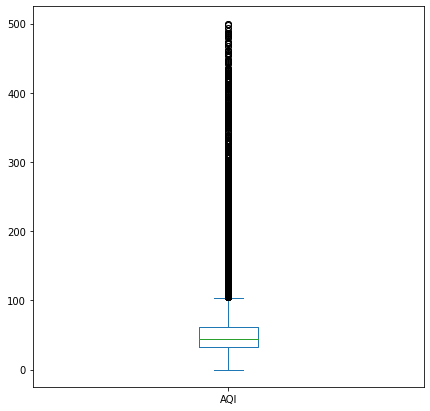

In [24]:
df['AQI'].plot.box(figsize=(7,7))

Acredito que a discretização do AQI se encaixe melhor aqui :)

In [25]:
df['AQI_dist'] = pd.cut(df['AQI'],5)

In [26]:
df['AQI_dist'].value_counts()

(-0.5, 100.0]     1413601
(100.0, 200.0]     118986
(200.0, 300.0]      10876
(300.0, 400.0]        151
(400.0, 500.0]         97
Name: AQI_dist, dtype: int64

Text(0.5, 0, 'AQI')

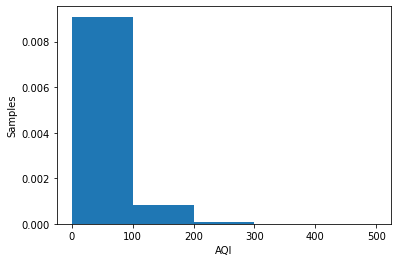

In [33]:
import matplotlib.pyplot as plt

plt.hist(df['AQI'], density=True, bins=5)
plt.ylabel('Samples')
plt.xlabel('AQI')

Podemos observar pela extração acima, assim como no boxplot, que a maioria das amostras possui seu `AQI` dentro do intervalo de 0-100. 

## Estatísticas descritivas

Vamos calcular a média do índice AQI por ano e, em seguida, analisar sua variação entre os anos.

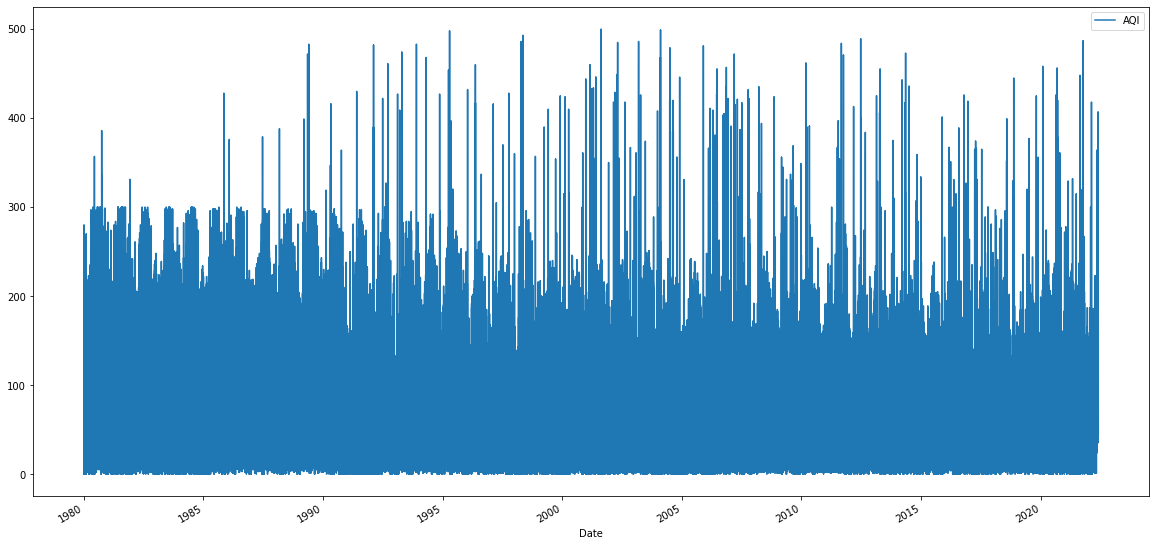

In [36]:
df.plot.line(x='Date', y='AQI', figsize=(20,10))

In [ ]:
# Vamos verificar a frequência de observações
print(sum(df['Category'] == 'Good'))
print(sum(df['Category'] == 'Moderate'))
print(sum(df['Category'] == 'Unhealthy'))
print(sum(df['Category'] == 'Very Unhealthy'))
print(sum(df['Category'] == 'Hazardous'))

999085
414516
31457
10876
248


Vamos primeiro extrair valores de média, mediana e desvio padrão e plotar

In [ ]:
# vamos calcular a média, mediana e desvio padrão para algumas das nossas features

mediaAQI = df['AQI'].mean()
medianaAQI = df['AQI'].median()
sdAQI = df['AQI'].std()
print(" Média: {}\n Mediana: {}\n Desvio padrão: {}\n".format(mediaAQI, medianaAQI, sdAQI))

 Média: 52.564830029034994
 Mediana: 44.0
 Desvio padrão: 51.37238904948967



O gráfico abaixo nos indica que a média e mediana estão uniformes entre si, o que significa que a distribuição dos nossos dados é normal e provavelmente não contém outliers.

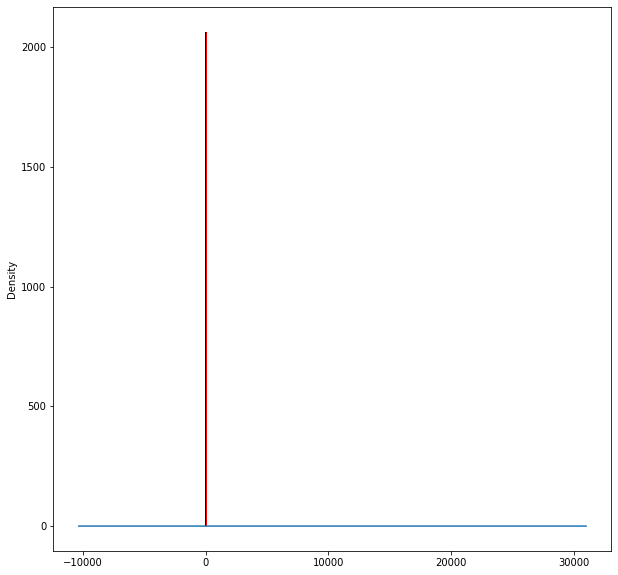

In [ ]:
df['AQI'].plot(kind='density', figsize=(10,10))

plt.vlines(df['AQI'].mean(),
           ymin=0,
           ymax=2064,
           linewidth=2);

plt.vlines(df['AQI'].median(),
           ymin = 0,
           ymax=2064,
           linewidth = 1,
           color='red',);

## Teste de hipótese